<a href="https://colab.research.google.com/github/felipetibarbosa/global-terror-predictor/blob/main/global_terror_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Classificação Precisa de Incidentes Terroristas: Identificando Padrões e Fatores de Risco

## 1.1 Sobre o Projeto

O projeto utiliza o Global Terrorism Database (GTD), acessível através do link: [Global Terroism Database](https://www.start.umd.edu/gtd/).

Este conjunto de dados contém informações sobre incidentes terroristas em todo o mundo desde 1970. Ele inclui características detalhadas como data, localização, grupo responsável, tipo de ataque, arma utilizada, entre outros. A base é extremamente rica, com mais de 200 mil registros e mais de 100 features, sendo uma excelente fonte para análise preditiva e classificação.

O objetivo deste projeto é desenvolver um sistema de classificação para identificar incidentes terroristas com base em características específicas, utilizando técnicas de machine learning para reconhecer padrões nos dados históricos.

![image.png](https://www.start.umd.edu/gtd/images/START_GTD-Heatmap_2020.jpg)

## 1.2 Sobre a Base de Dados

**Global Terrorism Database (GTD)**

Este conjunto de dados contém mais de 200.000 incidentes, com informações detalhadas sobre o contexto do ataque, como a localização, o tipo de arma, o método do ataque, as vítimas, e os grupos terroristas envolvidos.

**Problema:** O projeto visa prever o tipo de ataque e identificar o grupo responsável, utilizando características como a localização, a arma utilizada e a data do incidente.

**Features a serem utilizadas:** Localização geográfica (latitude e longitude), data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável. [Detalhes das Features](https://www.start.umd.edu/gtd/downloads/Codebook.pdf).



## 1.3 Explicando o Projeto

O projeto aborda a necessidade de prever e classificar incidentes terroristas com base em padrões históricos. Compreender os fatores que influenciam um ataque pode ajudar na alocação de recursos de segurança, antecipando possíveis ameaças.

A base de dados GTD oferece uma ampla gama de atributos que permitem identificar características recorrentes em ataques específicos. O objetivo é criar um modelo preditivo capaz de classificar novos incidentes terroristas com base em dados de eventos passados, utilizando técnicas como redes neurais, árvores de decisão ou ensemble learning.

O foco é em maximizar a precisão e minimizar falsos positivos, garantindo que o modelo seja útil para os responsáveis pela segurança pública e política de defesa.

## 1.4 Proposta

---

**Problema:** Como identificar padrões em ataques terroristas com base em dados históricos para prever o tipo de ataque e o grupo responsável?

**Features a serem utilizadas:** Localização, data, tipo de ataque, tipo de arma, número de vítimas, grupo responsável.

**A pergunta a ser respondida é:** Quais fatores influenciam o tipo de ataque e o grupo responsável por ele, e como podemos usar essas informações para prever futuros ataques com alta precisão?

# 2 - Metodologia CRISP-DM

CRISP-DM é um framework amplamente utilizado para Mineração de Dados que descreve uma abordagem estruturada para, planejamento, execução e avaliação da mineração de dados dos projetos. Esse framework fornece um passo a passo de processos que podem ser adaptados para várias áreas de negócio e tecnicas de mineração de dados, tornando-se uma ferramenta valiosa, para iniciantes e profissionais experientes.

Texto adaptado de: https://medium.com/@avikumart_/crisp-dm-framework-a-foundational-data-mining-process-model-86fe642da18c

---

![image](https://github.com/user-attachments/assets/c92378ce-ff8c-41a4-874d-1d623987c7e4)

Imagem retirada do slide: https://s2.smu.edu/~mhd/8331f03/crisp.pdf

## 2.1 Compreensão do Negócio

- **Objetivo:** Identificar o problema de segurança pública relacionado a ataques terroristas, visando prever o tipo de ataque e identificar padrões em grupos terroristas.

- **Tarefas**:
    - Compreender a importância da previsão de ataques para a segurança global.
    - Definir métricas, como precisão, recall e taxa de falsos positivos/negativos.

## 2.2 Entendimento dos Dados

- Objetivo: Coletar e entender as características dos dados do GTD.

- Tarefas:
    - Explorar o conjunto de dados GTD para identificar padrões e atributos relevantes.
    - Analisar a distribuição de atributos como localização, tipo de ataque e grupo responsável.

## 2.3 Preparação dos Dados

- Objetivo: Preparar os dados para a modelagem.

- Tarefas:
    - Limpar dados inconsistentes ou ausentes.
    - Realizar transformações de atributos, como converter datas e localizações em features relevantes.
    - Dividir os dados em conjuntos de treinamento, validação e teste.


## 2.4 Modelagem

- Objetivo: Desenvolver modelos preditivos utilizando algoritmos de machine learning.
- Tarefas:
    - Aplicar algoritmos de classificação (ex.: Random Forest, Redes Neurais, XGBoost) para prever o tipo de ataque.
    - Ajustar hiperparâmetros e comparar modelos para otimizar a performance.

## 2.5 Avaliação

- Objetivo: Avaliar a performance dos modelos utilizando métricas de classificação.
- Tarefas:
    - Avaliar precisão, recall, F1-score e ROC-AUC.
    - Comparar os resultados dos diferentes modelos e ajustar conforme necessário.

## 2.6 Implementação

- Objetivo: Implementar o modelo preditivo para uso prático.
- Tarefas:
    - Desenvolver um pipeline para classificar novos incidentes com base nos dados do GTD.
    - Documentar o processo e fornecer insights sobre possíveis melhorias.

# 3 - Execução do Projeto

## 3.1 Carregamento de Dependências e da Base de Dados

In [3]:
!pip install pandas
!pip install openpyxl
!pip install matplotlib
!pip install scikit-learn

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
colunas_interesse = ['iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
                     'city', 'attacktype1_txt',
                     'weaptype1_txt', 'nkill', 'nwound', 'gname'] #, 'latitude', 'longitude'

In [27]:
data = pd.read_excel('/content/drive/MyDrive/databases/globalterrorismdb_0522dist.xlsx',
                     sheet_name='Data', usecols=colunas_interesse)

In [28]:
data.head()

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,gname,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Unknown,Incendiary,NaN,NaN


In [29]:
print(f'{data.shape[0]} Instances.', end='\n')
print(f'{data.shape[1]} Features.')

209706 Instances.
11 Features.


In [30]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            209706 non-null  int64  
 1   imonth           209706 non-null  int64  
 2   iday             209706 non-null  int64  
 3   country_txt      209706 non-null  object 
 4   region_txt       209706 non-null  object 
 5   city             209279 non-null  object 
 6   attacktype1_txt  209706 non-null  object 
 7   gname            209706 non-null  object 
 8   weaptype1_txt    209706 non-null  object 
 9   nkill            197179 non-null  float64
 10  nwound           189770 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 91.8 MB


In [31]:
data.describe()

,iyear,imonth,iday,nkill,nwound
count,209706.000000,209706.000000,209706.000000,197179.000000,189770.000000
mean,2004.800993,6.455285,15.527930,2.431030,3.085872
std,13.519321,3.387098,8.801104,11.340882,40.916175
min,1970.000000,0.000000,0.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,0.000000,0.000000
50%,2012.000000,6.000000,15.000000,0.000000,0.000000
75%,2015.000000,9.000000,23.000000,2.000000,2.000000
max,2020.000000,12.000000,31.000000,1700.000000,10878.000000


## 3.2 Análise Exploratória

In [32]:
attack_per_year = data.groupby('iyear').size()

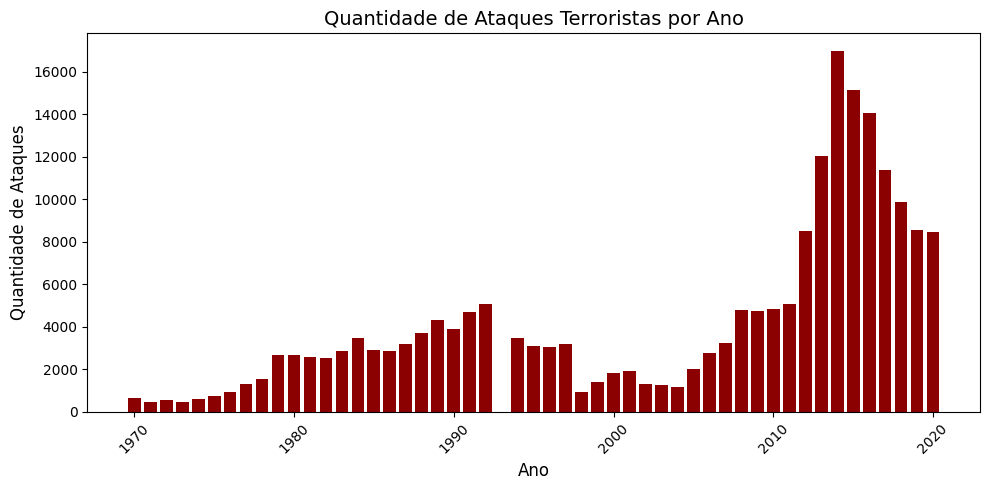

In [41]:
fig, ax = plt.subplots(figsize = (10, 5))
plt.bar(attack_per_year.index, attack_per_year.values, color='darkred')
plt.title('Quantidade de Ataques Terroristas por Ano', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Ataques', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
df_filtered = data[data['gname'] != 'Unknown']

# Contar o número de ataques por grupo terrorista
group_attacks = df_filtered['gname'].value_counts()

# Selecionar os top 10 grupos com mais ataques para visualização
top_10_groups = group_attacks.head(10)

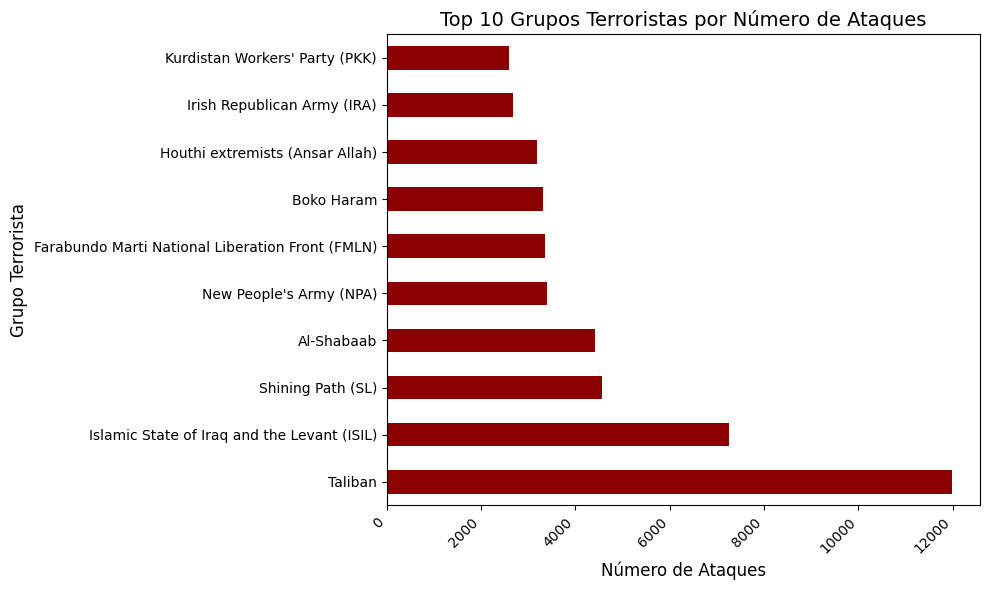

In [40]:
plt.figure(figsize=(10, 6))
top_10_groups.plot(kind='barh', color='darkred')
plt.title('Top 10 Grupos Terroristas por Número de Ataques', fontsize=14)
plt.xlabel('Número de Ataques', fontsize=12)
plt.ylabel('Grupo Terrorista', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 3.3 Preparação dos Dados

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
#chunk_size = 150000  # Ajuste o chunk conforme a memória disponível
chunks = pd.read_excel('/content/drive/MyDrive/databases/globalterrorismdb_0522dist.xlsx', sheet_name='Data', usecols=colunas_interesse) #, nrows=chunk_size

In [6]:
# Filtrar exemplos onde a variável y (rótulo) não é 'unknown'
data_clean = chunks[(chunks['gname'] != 'Unknown') & (chunks['weaptype1_txt'] != 'Unknown')]
data_clean

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,gname,weaptype1_txt,nkill,nwound
5,1970,1,1,United States,North America,Cairo,Armed Assault,Black Nationalists,Firearms,0.0,0.0
6,1970,1,2,Uruguay,South America,Montevideo,Assassination,Tupamaros (Uruguay),Firearms,0.0,0.0
8,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,New Year's Gang,Incendiary,0.0,0.0
9,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,New Year's Gang,Incendiary,0.0,0.0
10,1970,1,1,United States,North America,Baraboo,Bombing/Explosion,"Weather Underground, Weathermen",Explosives,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
209695,2020,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Tsamudzanzu,Hostage Taking (Kidnapping),Patriotic Resistance Front in Ituri (FRPI),Firearms,0.0,0.0
209698,2020,12,31,Democratic Republic of the Congo,Sub-Saharan Africa,Tingwe,Hostage Taking (Kidnapping),Allied Democratic Forces (ADF),Incendiary,25.0,NaN
209701,2020,12,31,Yemen,Middle East & North Africa,Sabaa,Bombing/Explosion,Houthi extremists (Ansar Allah),Explosives,NaN,NaN
209702,2020,12,31,Yemen,Middle East & North Africa,Beit Maghari,Bombing/Explosion,Houthi extremists (Ansar Allah),Explosives,NaN,NaN


In [7]:
data_clean.isnull().sum()

,0
iyear,0
imonth,0
iday,0
country_txt,0
region_txt,0
city,76
attacktype1_txt,0
gname,0
weaptype1_txt,0
nkill,6285


In [8]:
labelencoder = LabelEncoder()
# Processar cada chunk
for chunk in data_clean:
    # Trate cada pedaço (exemplo: encoding categórico)
    for column in ['country_txt', 'region_txt', 'city', 'attacktype1_txt', 'weaptype1_txt']:
        data_clean[column] = LabelEncoder().fit_transform(data_clean[column])

<ipython-input-8-f37b65a39f5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = LabelEncoder().fit_transform(data_clean[column])
<ipython-input-8-f37b65a39f5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[column] = LabelEncoder().fit_transform(data_clean[column])
<ipython-input-8-f37b65a39f5a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [9]:
data_clean['nkill'].fillna(data_clean['nkill'].median(), inplace = True)
data_clean['nwound'].fillna(data_clean['nwound'].median(), inplace = True)

<ipython-input-9-1361306ed703>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_clean['nkill'].fillna(data_clean['nkill'].median(), inplace = True)
<ipython-input-9-1361306ed703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['nkill'].fillna(data_clean['nkill'].median(), inplace = True)
<ipython-input-9-1361306ed703>:2: Futur

In [10]:
data_clean['nkill'] = data_clean['nkill'].astype('float32')
data_clean['nwound'] = data_clean['nwound'].astype('float32')
#data_clean['latitude'] = data_clean['latitude'].astype('float32')
#data_clean['longitude'] = data_clean['longitude'].astype('float32')

<ipython-input-10-e95a975e43a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['nkill'] = data_clean['nkill'].astype('float32')
<ipython-input-10-e95a975e43a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['nwound'] = data_clean['nwound'].astype('float32')


In [11]:
data_clean.isnull().sum()

,0
iyear,0
imonth,0
iday,0
country_txt,0
region_txt,0
city,0
attacktype1_txt,0
gname,0
weaptype1_txt,0
nkill,0


In [12]:
data_clean = data_clean.dropna(subset=['latitude', 'longitude'])

KeyError: ['latitude', 'longitude']

In [13]:
data_clean.shape

(102243, 11)

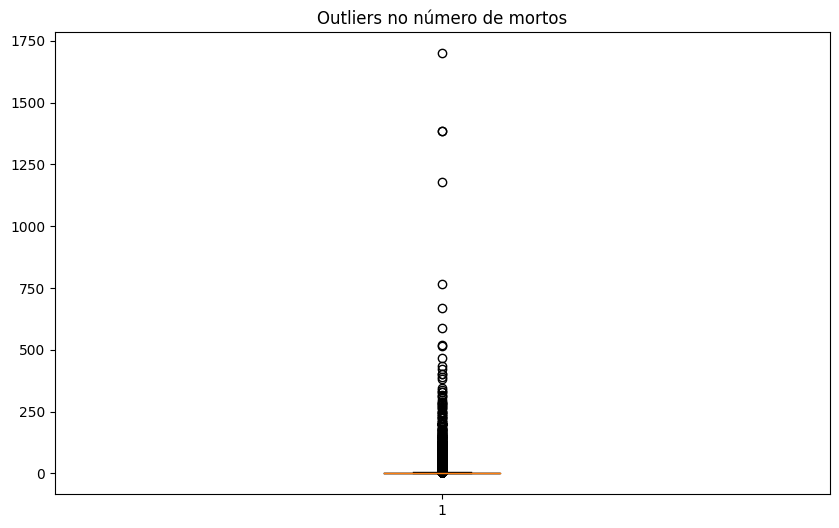

In [14]:
# Em dados de ataques terroristas, eventos extremos (como um ataque com muitas mortes ou feridos) podem ser reais e relevantes. Esses valores, apesar de parecerem outliers, podem refletir a realidade e não devem ser removidos ou ajustados.
plt.figure(figsize=(10, 6))
plt.boxplot(data_clean['nkill'])
plt.title('Outliers no número de mortos')
plt.show()

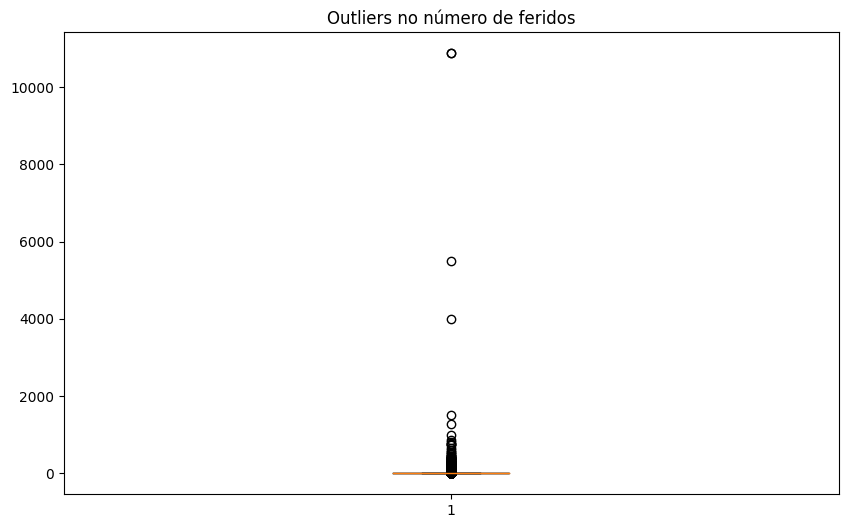

In [15]:
plt.figure(figsize=(10, 6))
plt.boxplot(data_clean['nwound'])
plt.title('Outliers no número de feridos')
plt.show()

In [16]:
# Variáveis independentes (features)
X = data_clean.drop('gname', axis=1)
X

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,weaptype1_txt,nkill,nwound
5,1970,1,1,176,6,4933,0,4,0.0,0.0
6,1970,1,2,177,7,17773,1,4,0.0,0.0
8,1970,1,2,176,6,15848,3,5,0.0,0.0
9,1970,1,3,176,6,15848,3,5,0.0,0.0
10,1970,1,1,176,6,3060,2,2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
209695,2020,12,31,39,10,26237,6,4,0.0,0.0
209698,2020,12,31,39,10,25916,6,5,25.0,0.0
209701,2020,12,31,185,5,22247,2,2,1.0,0.0
209702,2020,12,31,185,5,3509,2,2,1.0,0.0


In [17]:
# Variável dependente (label)
y = data_clean['gname']
y

,gname
5,Black Nationalists
6,Tupamaros (Uruguay)
8,New Year's Gang
9,New Year's Gang
10,"Weather Underground, Weathermen"
...,...
209695,Patriotic Resistance Front in Ituri (FRPI)
209698,Allied Democratic Forces (ADF)
209701,Houthi extremists (Ansar Allah)
209702,Houthi extremists (Ansar Allah)


In [18]:
# Dividindo em treino (60%), validação (20%) e teste (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# Exibir as formas dos conjuntos de dados
print(f'Tamanho do conjunto de treino: {X_train.shape}')
print(f'Tamanho do conjunto de teste: {X_test.shape}')
print(f'Tamanho do conjunto de validação: {X_val.shape}')

Tamanho do conjunto de treino: (61345, 10)
Tamanho do conjunto de teste: (20449, 10)
Tamanho do conjunto de validação: (20449, 10)


## 3.4 Modelagem

### 3.4.1 Random Forest

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [20]:
rf = RandomForestClassifier(
    random_state=42,
    max_depth=10,  # Limitar a profundidade
    min_samples_split=5,
    min_samples_leaf=3,
)

# Treinar no conjunto de treino
rf.fit(X_train, y_train)

# Avaliar no conjunto de validação
y_pred_val = rf.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Validation Accuracy:", accuracy_val)

Validation Accuracy: 0.6190522763949338


In [21]:
# Após otimização, avaliar no conjunto de teste
y_pred_test = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy_test)

Test Accuracy: 0.6305931830407355


In [22]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(rf, X, y, cv=5, train_sizes=[0.1, 0.3, 0.5, 0.7, 1.0], random_state=42)

# Média e desvio padrão das pontuações de treino e teste
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


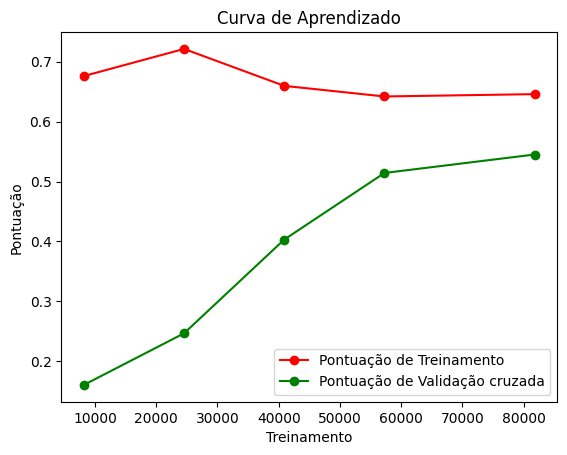

In [26]:
# Plotar as curvas de aprendizado - PROBLEMA DE OVERFFITING
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Pontuação de Treinamento')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Pontuação de Validação cruzada')

plt.title('Curva de Aprendizado')
plt.xlabel('Treinamento')
plt.ylabel('Pontuação')
plt.legend(loc='best')
plt.show()

In [24]:
data_clean

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,gname,weaptype1_txt,nkill,nwound
5,1970,1,1,176,6,4933,0,Black Nationalists,4,0.0,0.0
6,1970,1,2,177,7,17773,1,Tupamaros (Uruguay),4,0.0,0.0
8,1970,1,2,176,6,15848,3,New Year's Gang,5,0.0,0.0
9,1970,1,3,176,6,15848,3,New Year's Gang,5,0.0,0.0
10,1970,1,1,176,6,3060,2,"Weather Underground, Weathermen",2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
209695,2020,12,31,39,10,26237,6,Patriotic Resistance Front in Ituri (FRPI),4,0.0,0.0
209698,2020,12,31,39,10,25916,6,Allied Democratic Forces (ADF),5,25.0,0.0
209701,2020,12,31,185,5,22247,2,Houthi extremists (Ansar Allah),2,1.0,0.0
209702,2020,12,31,185,5,3509,2,Houthi extremists (Ansar Allah),2,1.0,0.0
